In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let's start by reading in one year's worth a data to get a better feel

In [2]:
#df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2015.xls', sheet_name = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'], index_col = 'Date-Fuel')

In [30]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2010.xls', sheet_name = None)

In [31]:
df.keys()

dict_keys(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'])

In [32]:
cdf = pd.concat(df,sort=False)

In [33]:
cdf

Date-Fuel          Total     00:15:00     00:30:00  \
Dec 0       12/01/10-Coal  351524.399900  3748.707711  3769.961605   
    1     12/01/10-Gas_CC  233117.488500  1907.625948  1813.319638   
    2     12/01/10-Gas_GT   17843.842440   160.360731   148.762175   
    3      12/01/10-Hydro     688.700889     3.537455     3.535279   
    4    12/01/10-Nuclear  124054.629000  1291.322450  1291.573536   
...                   ...            ...          ...          ...   
Jan 212   01/31/10-Gas_GT   88782.531103   850.991761   858.617845   
    213    01/31/10-Hydro    2736.772084    17.108960    18.048124   
    214  01/31/10-Nuclear  124022.121916  1291.837048  1291.734171   
    215      01/31/10-Oth   19533.593456   207.478598   209.710976   
    216      01/31/10-Wnd   36451.444553   250.885874   264.485257   

            00:45:00     01:00:00     01:15:00     01:30:00     01:45:00  \
Dec 0    3762.260029  3713.201352  3669.436081  3646.045253  3622.678648   
    1    1792.519522  1766.857416  1800.507924  1784.421077  1770.114269   
    2     148.717274   149.416358   147.833969   144.507415   145.511563   
    3       3.515940     3.554122     3.522475     3.533015     3.536210   
    4    1291.472767  1291.951652  1291.489454  1291.895841  1291.697332   
...              ...          ...          ...          ...          ...   
Jan 212   834.874492   817.156755   808.541143   793.459424   793.785006   
    213    18.155037    18.212343    10.599363    10.423687    10.431264   
    214  1291.660287  1291.942713  1291.811209  1291.971883  1291.906126   
    215   209.213166   205.039628   206.652237   202.063933   201.041940   
    216   275.346108   275.005418   268.549495   261.259842   253.734142   

            02:00:00  ...     23:00:00  23:15:00     23:30:00     23:45:00  \
Dec 0    3571.683585  ...  3233.677425   3191.63  3198.370127  3058.658732   
    1    1782.603895  ...  1958.879511   1833.09  1714.131204  1661.477121   
    2     144.844571  ...   125.573040   125.564   125.736235   125.677860   
    3       3.536358  ...     3.058950   3.05149     3.036842     2.914457   
    4    1292.098032  ...  1292.388485   1292.35  1292.229145  1292.410301   
...              ...  ...          ...       ...          ...          ...   
Jan 212   784.672455  ...   834.073025   757.097   717.020442   694.652076   
    213    10.428839  ...    12.999120   12.9949    12.997233    12.986612   
    214  1291.903054  ...  1291.492771   1291.48  1291.573577  1291.418089   
    215   201.094560  ...   211.305958   203.918   201.099650   199.742564   
    216   243.940493  ...   600.009168   602.769   612.027505   647.757337   

            00:00:00  1900-01-01 00:00:00  DST1  DST2  DST3  DST4  
Dec 0    2955.680626                  NaN   NaN   NaN   NaN   NaN  
    1    1686.208300                  NaN   NaN   NaN   NaN   NaN  
    2     127.202106                  NaN   NaN   NaN   NaN   NaN  
    3       2.768646                  NaN   NaN   NaN   NaN   NaN  
    4    1292.359249                  NaN   NaN   NaN   NaN   NaN  
...              ...                  ...   ...   ...   ...   ...  
Jan 212          NaN           679.266261   NaN   NaN   NaN   NaN  
    213          NaN            13.305067   NaN   NaN   NaN   NaN  
    214          NaN          1291.861914   NaN   NaN   NaN   NaN  
    215          NaN           195.472347   NaN   NaN   NaN   NaN  
    216          NaN           679.227618   NaN   NaN   NaN   NaN  

[2555 rows x 103 columns]

In [34]:
cdf.rename(columns = {'Date-Fuel': 'fuel'}, inplace=True)

cdf[['Date', 'Fuel']] = cdf.fuel.str.split("-", expand=True)

In [35]:
full_df = cdf[['Date', 'Fuel', 'Total']]

In [36]:
full_df

Date     Fuel          Total
Dec 0    12/01/10     Coal  351524.399900
    1    12/01/10   Gas_CC  233117.488500
    2    12/01/10   Gas_GT   17843.842440
    3    12/01/10    Hydro     688.700889
    4    12/01/10  Nuclear  124054.629000
...           ...      ...            ...
Jan 212  01/31/10   Gas_GT   88782.531103
    213  01/31/10    Hydro    2736.772084
    214  01/31/10  Nuclear  124022.121916
    215  01/31/10      Oth   19533.593456
    216  01/31/10      Wnd   36451.444553

[2555 rows x 3 columns]

In [37]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = full_df['Date'].unique()
full_df = full_df.set_index([full_df.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()

In [38]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
full_df['date'] = pd.date_range(start='2010-01-01', periods=len(full_df), freq='D')

In [39]:
full_df

Fuel,Coal,Gas_CC,Gas_GT,Hydro,Nuclear,Oth,Wnd,date
0,351524.399900,233117.488500,17843.842440,688.700889,124054.629000,1333.991010,88444.001590,2010-01-01
1,357011.746000,218557.985400,17030.313010,756.919730,123991.920300,1345.547914,50031.403060,2010-01-02
2,352858.999400,152995.145100,10478.312270,784.491500,123909.651300,1445.740640,91401.560350,2010-01-03
3,307648.920400,129684.581200,8728.833569,420.952511,123863.274800,1354.274086,115537.667100,2010-01-04
4,334763.892200,202647.507300,20252.475300,500.900862,123992.381900,1401.581616,48259.652200,2010-01-05
...,...,...,...,...,...,...,...,...
360,330654.348100,137319.504706,34168.627654,1605.670932,124051.431684,8295.862511,92818.559921,2010-12-27
361,325109.921195,125942.796124,48386.508410,1616.292145,123895.389184,10147.183823,94067.859146,2010-12-28
362,335042.945294,249200.596611,75535.374528,3640.312795,123902.275252,13062.044321,60350.704814,2010-12-29
363,356673.479131,335514.263233,88045.264253,3467.455910,123983.641003,18784.994272,24848.929380,2010-12-30


In [40]:
full_df = full_df.set_index('date')


In [41]:
full_df

Fuel,Coal,Gas_CC,Gas_GT,Hydro,Nuclear,Oth,Wnd
date,,,,,,,
2010-01-01,351524.399900,233117.488500,17843.842440,688.700889,124054.629000,1333.991010,88444.001590
2010-01-02,357011.746000,218557.985400,17030.313010,756.919730,123991.920300,1345.547914,50031.403060
2010-01-03,352858.999400,152995.145100,10478.312270,784.491500,123909.651300,1445.740640,91401.560350
2010-01-04,307648.920400,129684.581200,8728.833569,420.952511,123863.274800,1354.274086,115537.667100
2010-01-05,334763.892200,202647.507300,20252.475300,500.900862,123992.381900,1401.581616,48259.652200
...,...,...,...,...,...,...,...
2010-12-27,330654.348100,137319.504706,34168.627654,1605.670932,124051.431684,8295.862511,92818.559921
2010-12-28,325109.921195,125942.796124,48386.508410,1616.292145,123895.389184,10147.183823,94067.859146
2010-12-29,335042.945294,249200.596611,75535.374528,3640.312795,123902.275252,13062.044321,60350.704814


### We need to rename 'Wnd' to 'Wind' and 'Oth' to 'Other'

In [49]:
full_df.rename(columns  = {'Wnd':'Wind', 'Oth':'Other'}, inplace = True)

### Let's combine 'Gas_CC' & 'Gas-GT' as one column - 'NGas' for natural gas

In [47]:
full_df['NGas'] = full_df['Gas_CC'] + full_df['Gas_GT']
full_df.drop(columns = ['Gas_CC', 'Gas_GT'], inplace = True)

KeyError: 'Gas_CC'

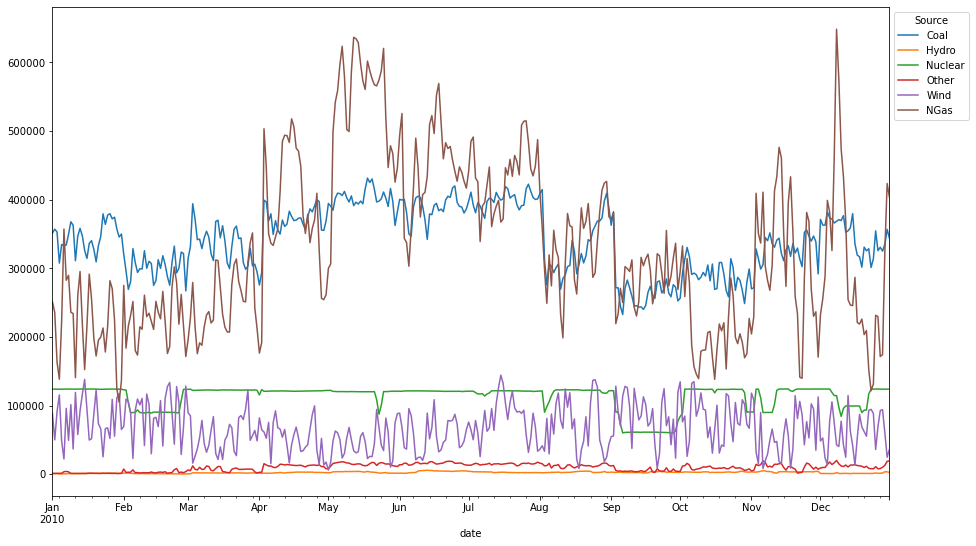

In [50]:
full_df.plot(figsize=(15,9)).legend(title='Source', bbox_to_anchor=(1, 1));


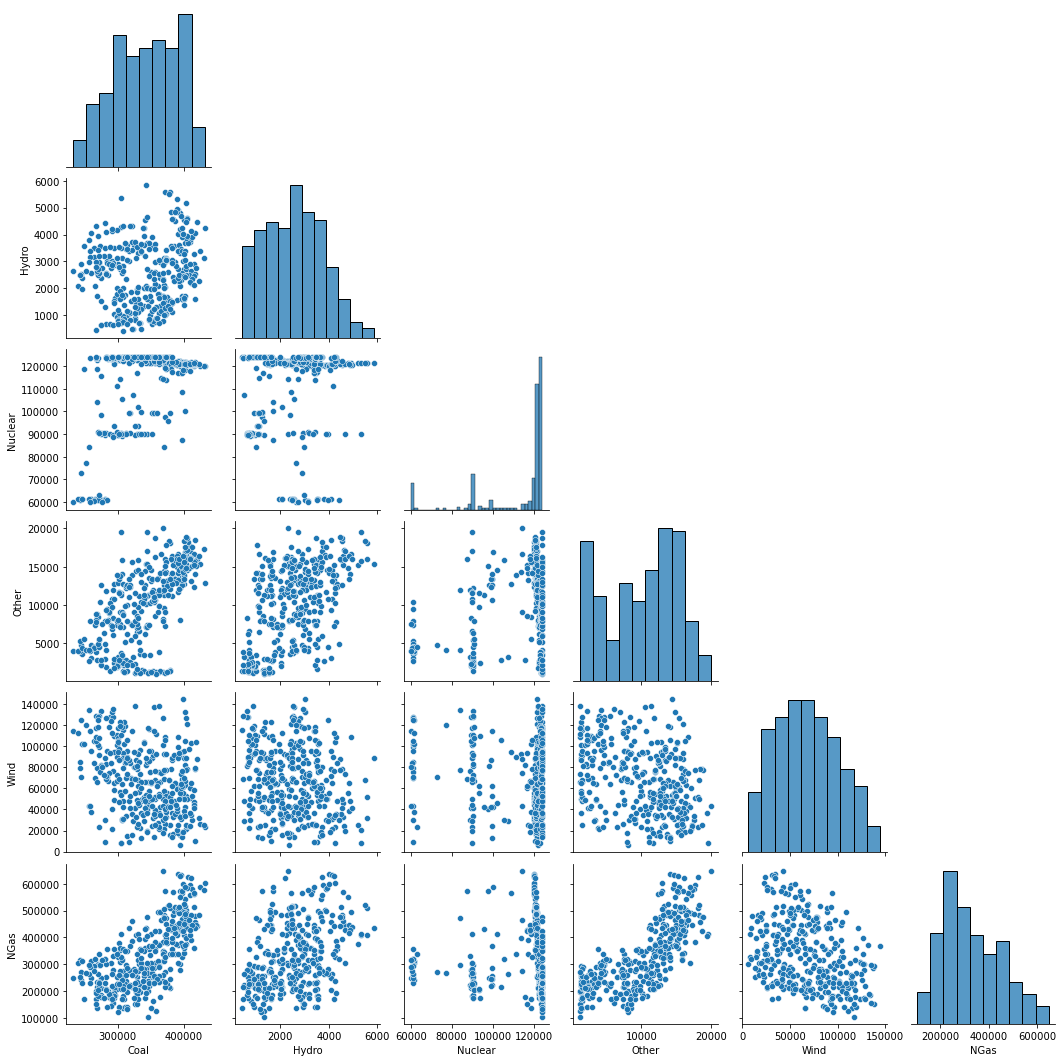

In [51]:
sns.pairplot(full_df, corner=True)

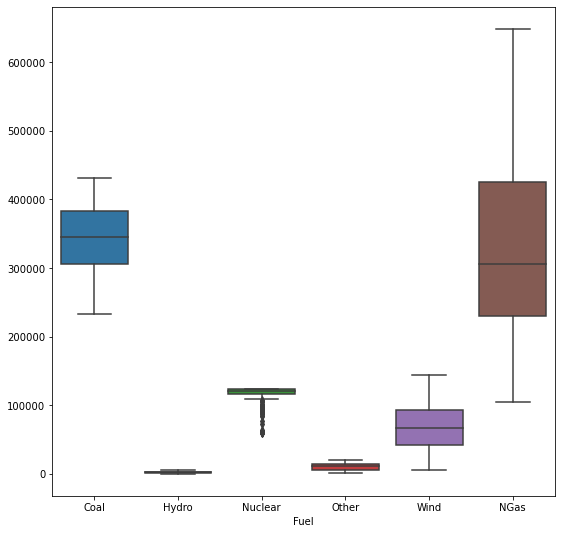

In [52]:
plt.figure(figsize=(9,9))
sns.boxplot(data = full_df,
            
            );


### Export the cleaned data

In [53]:
full_df.to_csv('../data/final_dfs/2010_clean.csv')